In [1]:
!rm -rf fast_slow_rate/
!rm fast*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
!git clone https://github.com/chrisliu298/fast_slow_rate.git
!cp /content/fast_slow_rate/fast_slow_rate_experiment/experiment_v2/fast_slow_rate_v2_stage_1.tsv .
!cp /content/fast_slow_rate/fast_slow_rate_experiment/experiment_v2/fast_slow_rate_v2_stage_2.tsv .

Cloning into 'fast_slow_rate'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 128 (delta 6), reused 24 (delta 5), pack-reused 101
Receiving objects: 100% (128/128), 49.33 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Checking out files: 100% (24/24), done.


In [4]:
plt.rcParams.update({'font.size': 16})

In [5]:
def curve(n, a, b, c):
    return a + b * (n ** c)

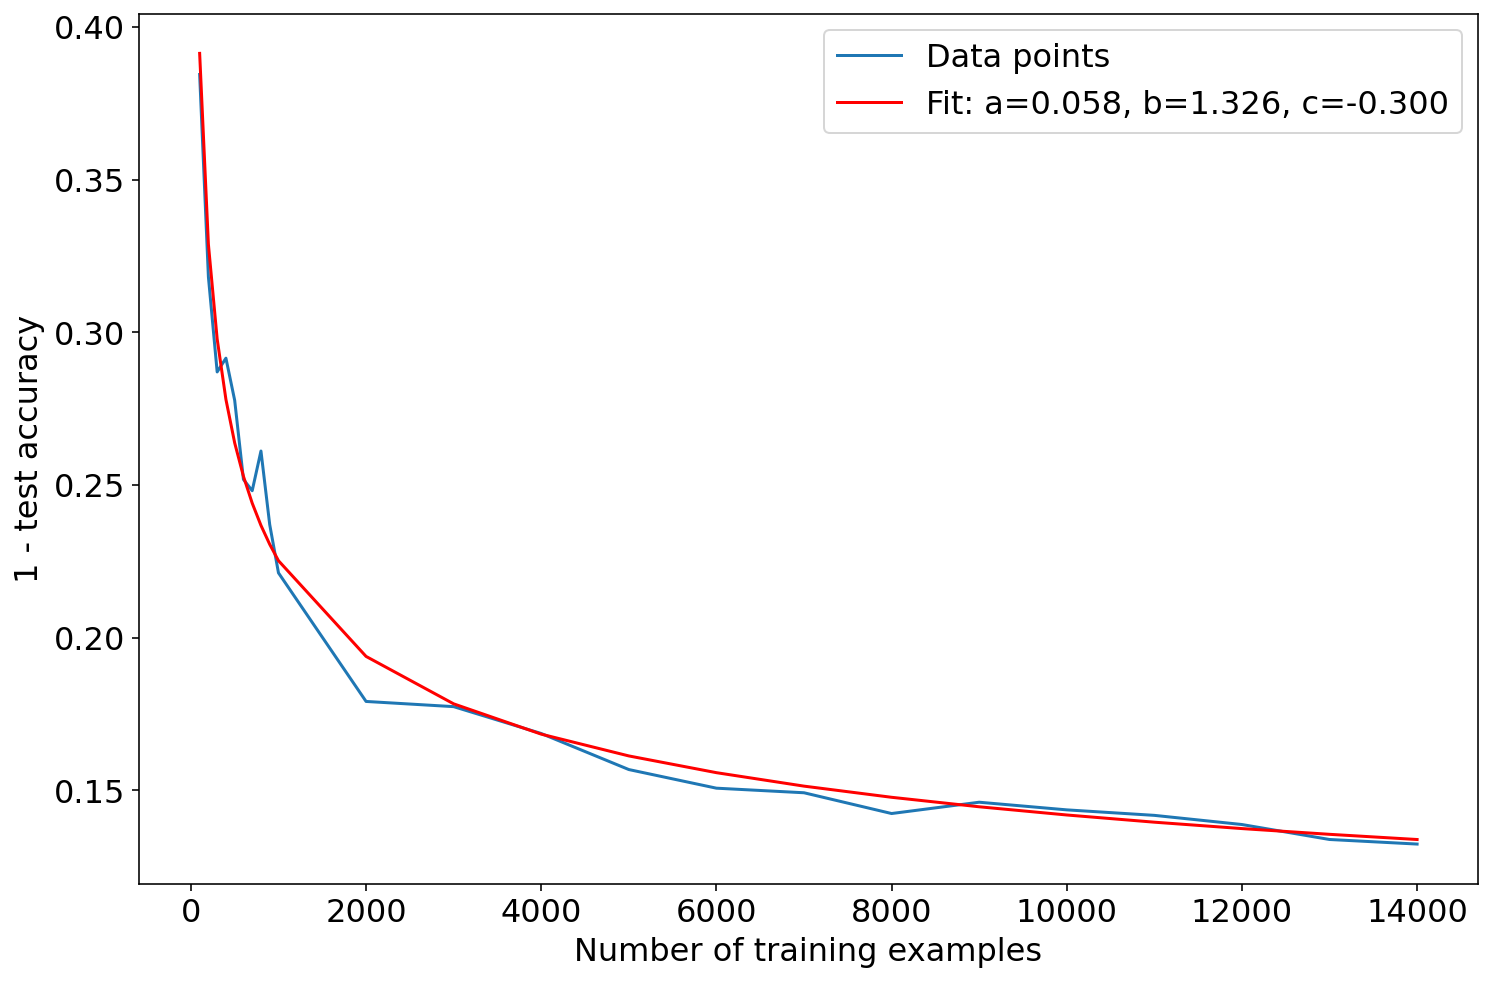

In [12]:
df1 = pd.read_csv("fast_slow_rate_v2_stage_1.tsv", delimiter="\t")

X1 = np.array(df1["Training Size"])
y1 = 1 - np.array(df1["Testing Acc"])

plt.figure(figsize=(12, 8))
plt.plot(X1, y1, label="Data points")

popt1, pcov = curve_fit(curve, X1, y1, 
                       p0=[1, 3, -1], 
                       bounds=([0, -np.inf, -np.inf], [1, np.inf, -.3]), 
                       maxfev=3000)
plt.plot(X1, curve(X1, *popt1), 'r-', label='Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt1))

plt.xlabel('Number of training examples')
plt.ylabel('1 - test accuracy')
plt.legend()
plt.show()

## Stage 2 (without hyperparameter search)

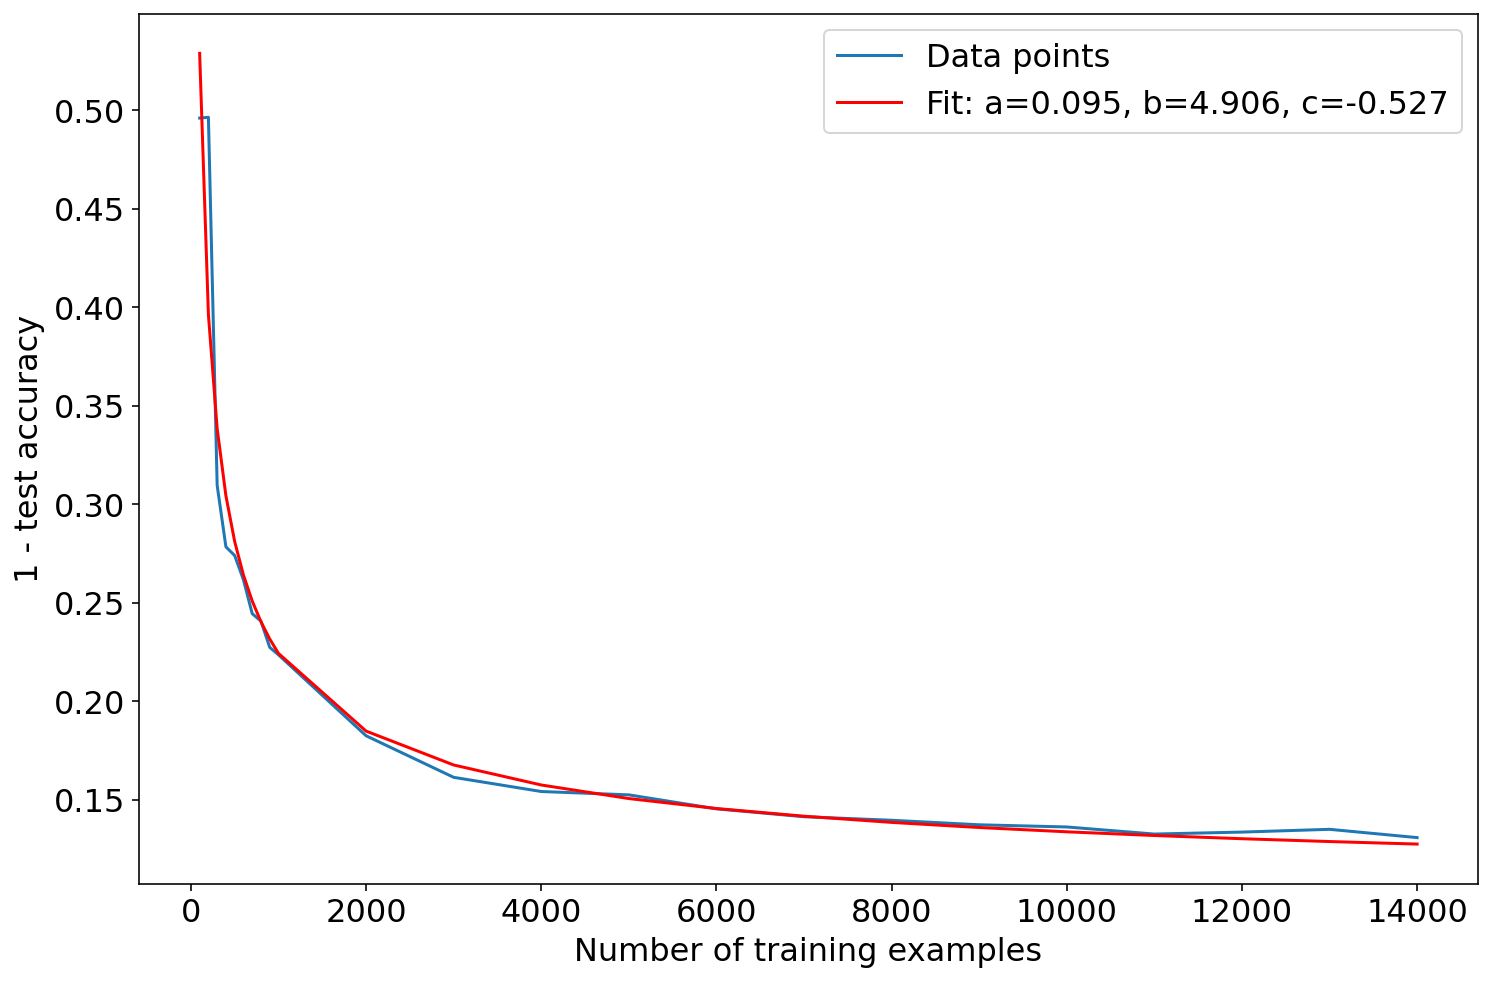

In [7]:
df2 = pd.read_csv("fast_slow_rate_v2_stage_2.tsv", delimiter="\t")

X2 = np.array(df2["Training Size"])
y2 = 1 - np.array(df2["Testing Acc"])

plt.figure(figsize=(12, 8))
plt.plot(X2, y2, label="Data points")

popt2, pcov = curve_fit(curve, X2, y2, 
                       p0=[1, 3, -1], 
                       bounds=([0, -np.inf, -np.inf], [1, np.inf, -.5]), 
                       maxfev=3000)
plt.plot(X2, curve(X2, *popt2), 'r-', label='Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))

plt.xlabel('Number of training examples')
plt.ylabel('1 - test accuracy')
plt.legend()
plt.show()

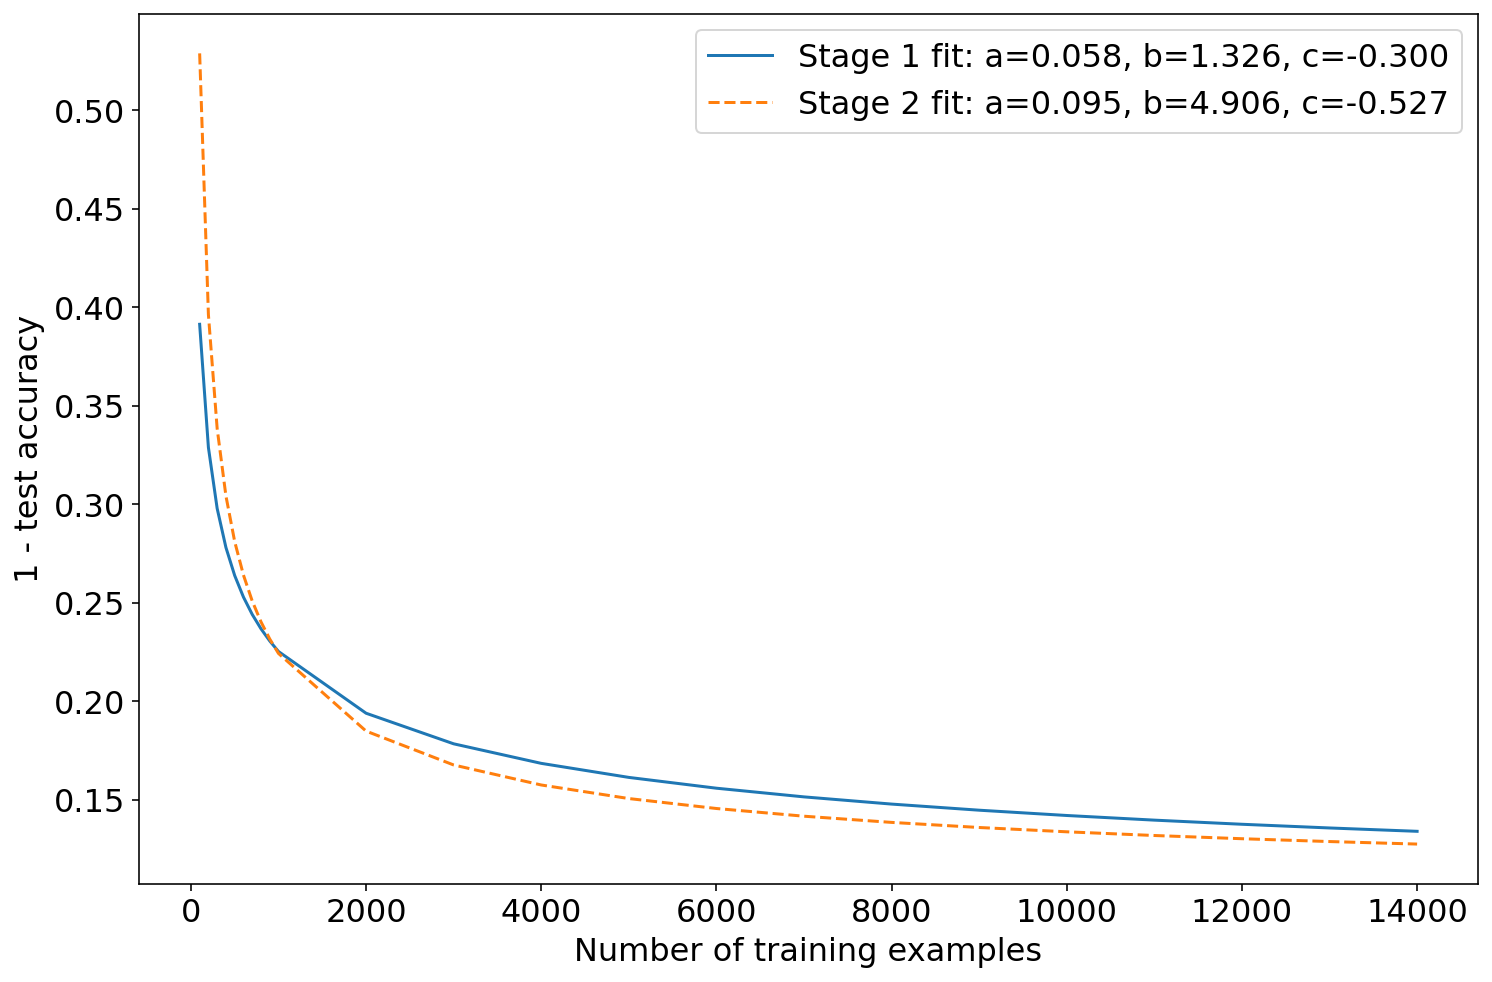

In [8]:
plt.figure(figsize=(12, 8))

# plt.plot(X1, y1, label="Stage 1 data points")
# plt.plot(X2, y2, ":", label="Stage 2 data points")
plt.plot(X1, curve(X1, *popt1), label="Stage 1 fit: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt1))
plt.plot(X2, curve(X2, *popt2), "--", label="Stage 2 fit: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt2))

plt.xlabel("Number of training examples")
plt.ylabel("1 - test accuracy")
plt.legend()
plt.show()